# Import Required Libraries

Import the necessary libraries, including pandas and os.


In [40]:
import pandas as pd
import os
import json

# Define the Directory Path

Define the path to the 'runs6_res' directory.


In [43]:
directory_path = "../runs6_res/"

# add a specific folder name to the path
specific_folder_name = "grid_bm25"
directory_path = os.path.join(directory_path, specific_folder_name)

# Read Files and Extract Data

Use os to list all files in the directory, then open each file and extract the data.


In [44]:
listdir = os.listdir(directory_path)
listdir

['BengezzouIdrissMezianeGhilas_36_bm25_article_stop670_porter_k1.1_b0.7.i.txt',
 'BengezzouIdrissMezianeGhilas_49_bm25_article_stop670_porter_k1.3_b0.65.i.txt',
 'BengezzouIdrissMezianeGhilas_59_bm25_article_stop670_porter_k1.4_b0.8.i.txt',
 'BengezzouIdrissMezianeGhilas_39_bm25_article_stop670_porter_k1.2_b0.5.i.txt',
 'BengezzouIdrissMezianeGhilas_41_bm25_article_stop670_porter_k1.2_b0.6.i.txt',
 'BengezzouIdrissMezianeGhilas_28_bm25_article_stop670_porter_k1.0_b0.65.i.txt',
 'BengezzouIdrissMezianeGhilas_38_bm25_article_stop670_porter_k1.1_b0.8.i.txt',
 'BengezzouIdrissMezianeGhilas_34_bm25_article_stop670_porter_k1.1_b0.6.i.txt',
 'BengezzouIdrissMezianeGhilas_33_bm25_article_stop670_porter_k1.1_b0.55.i.txt',
 'BengezzouIdrissMezianeGhilas_43_bm25_article_stop670_porter_k1.2_b0.7.i.txt',
 'BengezzouIdrissMezianeGhilas_32_bm25_article_stop670_porter_k1.1_b0.5.i.txt',
 'BengezzouIdrissMezianeGhilas_37_bm25_article_stop670_porter_k1.1_b0.75.i.txt',
 'BengezzouIdrissMezianeGhilas_29_bm

In [45]:
def read_result_file(file_path):
    column_names = ["Metric", "Query", "Value"]
    df = pd.read_csv(
        file_path,
        delimiter="\t+",
        header=None,
        skiprows=1,
        skip_blank_lines=True,
        skipfooter=1,
        engine="python",
        names=column_names,
    )
    return df


read_result_file(os.path.join(directory_path, listdir[0])).head(15)

,Metric,Query,Value
0,num_ret,2009011,1.500000e+03
1,num_rel,2009011,2.600000e+01
2,num_rel_ret,2009011,2.500000e+01
3,ret_size,2009011,1.709626e+07
4,rel_size,2009011,7.115400e+04
5,rel_ret_size,2009011,7.042700e+04
6,gP[1],2009011,0.000000e+00
7,gR[1],2009011,3.846154e-02
8,gP[2],2009011,0.000000e+00
9,gR[2],2009011,7.692308e-02


In [79]:
# for each file in the directory, read the file
# and store the result in a dictionary
results = {}
for file in listdir:

    file_path = os.path.join(directory_path, file)
    df = read_result_file(file_path)

    print(df["Metric"])

    results[file] = {
        "k1": file.split("_")[6][1:],
        "b": file.split("_")[7][1:].split("i")[0][:-1],
        "magp": df[df["Metric"] == "MAgP"]["Value"].values[0],
        "p": df[df["Metric"] == "ircl_prn.0,10"]["Value"].values[0],
    }

0            num_ret
1            num_rel
2        num_rel_ret
3           ret_size
4           rel_size
           ...      
175    ircl_prn.0,60
176    ircl_prn.0,70
177    ircl_prn.0,80
178    ircl_prn.0,90
179    ircl_prn.1,00
Name: Metric, Length: 180, dtype: object
0            num_ret
1            num_rel
2        num_rel_ret
3           ret_size
4           rel_size
           ...      
175    ircl_prn.0,60
176    ircl_prn.0,70
177    ircl_prn.0,80
178    ircl_prn.0,90
179    ircl_prn.1,00
Name: Metric, Length: 180, dtype: object
0            num_ret
1            num_rel
2        num_rel_ret
3           ret_size
4           rel_size
           ...      
175    ircl_prn.0,60
176    ircl_prn.0,70
177    ircl_prn.0,80
178    ircl_prn.0,90
179    ircl_prn.1,00
Name: Metric, Length: 180, dtype: object
0            num_ret
1            num_rel
2        num_rel_ret
3           ret_size
4           rel_size
           ...      
175    ircl_prn.0,60
176    ircl_prn.0,70
177    ircl_prn.

In [71]:
results

{'BengezzouIdrissMezianeGhilas_36_bm25_article_stop670_porter_k1.1_b0.7.i.txt': {'k1': '1.1',
  'b': '0.7',
  'magp': 0.220182420301323,
  'p': 0.5602913140051777},
 'BengezzouIdrissMezianeGhilas_49_bm25_article_stop670_porter_k1.3_b0.65.i.txt': {'k1': '1.3',
  'b': '0.65',
  'magp': 0.2349495765646616,
  'p': 0.5624966085075318},
 'BengezzouIdrissMezianeGhilas_59_bm25_article_stop670_porter_k1.4_b0.8.i.txt': {'k1': '1.4',
  'b': '0.8',
  'magp': 0.2039841879303442,
  'p': 0.540973731380772},
 'BengezzouIdrissMezianeGhilas_39_bm25_article_stop670_porter_k1.2_b0.5.i.txt': {'k1': '1.2',
  'b': '0.5',
  'magp': 0.2343454029795116,
  'p': 0.5148526570282723},
 'BengezzouIdrissMezianeGhilas_41_bm25_article_stop670_porter_k1.2_b0.6.i.txt': {'k1': '1.2',
  'b': '0.6',
  'magp': 0.2320318430079675,
  'p': 0.5247962075997309},
 'BengezzouIdrissMezianeGhilas_28_bm25_article_stop670_porter_k1.0_b0.65.i.txt': {'k1': '1.0',
  'b': '0.65',
  'magp': 0.2365446454413519,
  'p': 0.5688279659783004},
 '

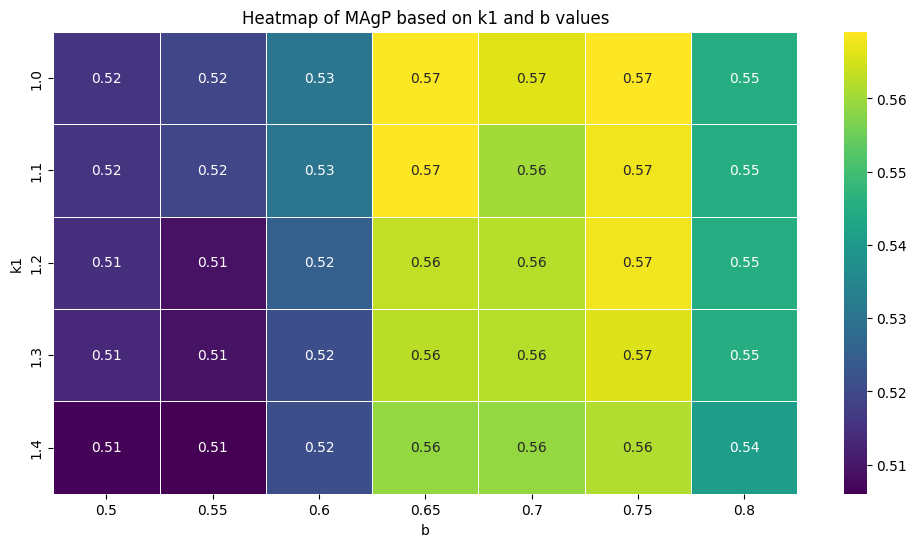

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(results, orient="index").reset_index()
df.columns = ["filename", "k1", "b", "magp", "p"]

# Convert 'k1' and 'b' to numeric values for sorting
df["k1"] = pd.to_numeric(df["k1"])
df["b"] = pd.to_numeric(df["b"])

# Pivot the DataFrame to prepare for heatmap
pivot_df = df.pivot(index="k1", columns="b", values="p")

# Plotting heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, cmap="viridis", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap of MAgP based on k1 and b values")
plt.xlabel("b")
plt.ylabel("k1")
plt.show()